<a href="https://colab.research.google.com/github/Amiya-Kalita/Machine-Learning/blob/main/2_AdaBoost_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introductions :
AdaBoost (Adaptive Boosting) is a machine learning ensemble algorithm. It works by training a series of weak learners (typically decision trees) on weighted versions of the training data. Initially, all data points have equal weights. In each subsequent iteration, the weights of misclassified data points are increased, forcing the next weak learner to focus more on those "difficult" examples. The final prediction is a weighted sum of the predictions from all the weak learners, where the weights are determined by the accuracy of each learner. AdaBoost is known for its ability to improve the performance of simple models and is often used for classification tasks.

## 1. Loading All the Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree , DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report , mean_squared_error , confusion_matrix ,roc_auc_score ,roc_curve
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

##2. Loading and processing the dataset

In [ ]:
data = load_breast_cancer()

x= data.data
y= data.target

df = pd.DataFrame(x, columns=data.feature_names)
df['target'] = y

In [ ]:
df.shape

(569, 31)

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
df['target'].value_counts()

,count
target,
1,357
0,212


### 3. Spliting dataset into training and testing sets

In [ ]:
x = df.drop('target' , axis =1)
y = df['target']

In [ ]:
x.shape

(569, 30)

In [ ]:
y.shape

(569,)

In [ ]:
x_train , x_test , y_train ,y_test = train_test_split(x , y , test_size=0.2 , random_state=42 , stratify=y)

In [ ]:
x_train.shape

(455, 30)

In [ ]:
y_train.shape

(455,)

### 4. Scalling The values of the Data

In [ ]:
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [ ]:
x_train_scaled.shape

(455, 30)

In [ ]:
x_test_scaled

array([[ 1.56851278,  2.16401585,  1.74286587, ...,  1.20214432,
        -0.14043064,  0.90036171],
       [-0.84027641, -0.5970672 , -0.8741735 , ..., -1.10124064,
        -0.81429139, -0.71323608],
       [-0.07072262,  1.19138742,  0.03202768, ...,  0.57255843,
         1.14997397,  1.86841162],
       ...,
       [ 0.3583966 , -0.44935493,  0.48264098, ...,  1.63386036,
         0.54117564,  1.91191948],
       [-0.41401799,  1.07321761, -0.42314565, ...,  0.06139464,
        -0.1280378 ,  0.64747227],
       [-0.6829327 , -0.69932953, -0.66607058, ..., -0.23615965,
        -0.16211811, -0.20147486]])

### 5. Buiding basics Adaboost Model

In [ ]:
base_adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

In [ ]:
# training the model
base_adaboost.fit(x_train_scaled ,y_train )

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

### 6. Making Predictions

In [ ]:
y_pred_train = base_adaboost.predict(x_train_scaled)
y_pred_test = base_adaboost.predict(x_test_scaled)

In [ ]:
y_pred_train

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,

In [ ]:
y_pred_test

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])

### 7. Accuracy Testing

In [ ]:
train_accuracy = accuracy_score(y_train,y_pred_train)
train_accuracy

1.0

In [ ]:
test_accuracy = accuracy_score(y_test, y_pred_test)
test_accuracy

0.956140350877193

### 8. Hyper parameter Tuning Using GridSearchCV

In [ ]:
# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100],           # Number of weak learners
    'learning_rate': [0.01, 0.1],   # Shrinkage parameter
    'estimator__max_depth': [1, 2],              # Depth of decision trees
    'estimator__min_samples_split': [2, 5],     # Min samples to split
    'estimator__min_samples_leaf': [1, 2]        # Min samples in leaf
}

In [ ]:
ada_classifier = AdaBoostClassifier(
    estimator= DecisionTreeClassifier(random_state=42),
    random_state= 42
)

In [ ]:
grid_search = GridSearchCV(
    estimator= ada_classifier,
    param_grid = param_grid,
    cv = 3,
    scoring= 'accuracy',
    n_jobs= -1,
    verbose=2,
    return_train_score= True
)

In [ ]:
grid_search.fit(x_train_scaled,y_train)
print("Grid Search completed ")

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Grid Search completed 


### 9. Analyzeing GridSearch Results

In [ ]:
best_params = grid_search.best_params_
best_params

{'estimator__max_depth': 2,
 'estimator__min_samples_leaf': 2,
 'estimator__min_samples_split': 2,
 'learning_rate': 0.1,
 'n_estimators': 100}

In [ ]:
best_score = grid_search.best_score_
best_score

np.float64(0.9648541884512606)

In [ ]:
best_model = grid_search.best_estimator_
best_model

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    min_samples_leaf=2,
                                                    random_state=42),
                   learning_rate=0.1, n_estimators=100, random_state=42)

In [ ]:
print("\nBest Parameters Found:")
print("-" * 50)
for param, value in best_params.items():
    print(f"{param}: {value}")

print(f"\nBest Cross-Validation Score: {best_score * 100:.2f}%")

# Get detailed results
results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df.sort_values('rank_test_score')

print("\nTop 5 Parameter Combinations:")
print("-" * 50)
top_5 = results_df[['params', 'mean_test_score', 'std_test_score']].head()
for idx, row in top_5.iterrows():
    print(f"\nRank {row.name + 1}:")
    print(f"Parameters: {row['params']}")
    print(f"Mean CV Score: {row['mean_test_score']:.4f} (+/- {row['std_test_score']:.4f})")


Best Parameters Found:
--------------------------------------------------
estimator__max_depth: 2
estimator__min_samples_leaf: 2
estimator__min_samples_split: 2
learning_rate: 0.1
n_estimators: 100

Best Cross-Validation Score: 96.49%

Top 5 Parameter Combinations:
--------------------------------------------------

Rank 28:
Parameters: {'estimator__max_depth': 2, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 2, 'learning_rate': 0.1, 'n_estimators': 100}
Mean CV Score: 0.9649 (+/- 0.0081)

Rank 32:
Parameters: {'estimator__max_depth': 2, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 5, 'learning_rate': 0.1, 'n_estimators': 100}
Mean CV Score: 0.9649 (+/- 0.0081)

Rank 24:
Parameters: {'estimator__max_depth': 2, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 5, 'learning_rate': 0.1, 'n_estimators': 100}
Mean CV Score: 0.9627 (+/- 0.0111)

Rank 20:
Parameters: {'estimator__max_depth': 2, 'estimator__min_samples_leaf': 1, 'estima

### 10. Evaluating Best Model

In [ ]:
# Make predictions with best model
y_pred_best_train = best_model.predict(x_train_scaled)
y_pred_best_test = best_model.predict(x_test_scaled)

# Get prediction probabilities for ROC curve
y_pred_proba = best_model.predict_proba(x_test_scaled)[:, 1]

# Calculate metrics
best_train_accuracy = accuracy_score(y_train, y_pred_best_train)
best_test_accuracy = accuracy_score(y_test, y_pred_best_test)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("=" * 50)
print("OPTIMIZED ADABOOST MODEL PERFORMANCE")
print("=" * 50)
print(f"Training Accuracy: {best_train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {best_test_accuracy * 100:.2f}%")
print(f"ROC-AUC Score: {roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_test,
                          target_names=['Malignant', 'Benign']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_best_test)
print(cm)

### 11. Model comperision

In [ ]:
# Compare base model vs optimized model
comparison = pd.DataFrame({
    'Model': ['Base AdaBoost', 'Optimized AdaBoost'],
    'Training Accuracy': [train_accuracy * 100, best_train_accuracy * 100],
    'Test Accuracy': [test_accuracy * 100, best_test_accuracy * 100],
    'Improvement': [0, (best_test_accuracy - test_accuracy) * 100]
})

print("\n" + "=" * 50)
print("MODEL COMPARISON")
print("=" * 50)
print(comparison.to_string(index=False))
print(f"\nPerformance Improvement: {(best_test_accuracy - test_accuracy) * 100:.2f}%")


MODEL COMPARISON
             Model  Training Accuracy  Test Accuracy  Improvement
     Base AdaBoost              100.0      95.614035          0.0
Optimized AdaBoost              100.0      95.614035          0.0

Performance Improvement: 0.00%


### 12. Vitualizing Feature Importance


TOP 10 MOST IMPORTANT FEATURES
             Feature  Importance
     worst perimeter    0.166761
worst concave points    0.137217
          worst area    0.127191
        worst radius    0.107581
       worst texture    0.070885
          area error    0.060444
    worst smoothness    0.051671
           mean area    0.050419
        mean texture    0.049972
 mean concave points    0.035050

Feature importance plot saved as 'adaboost_feature_importance.png'


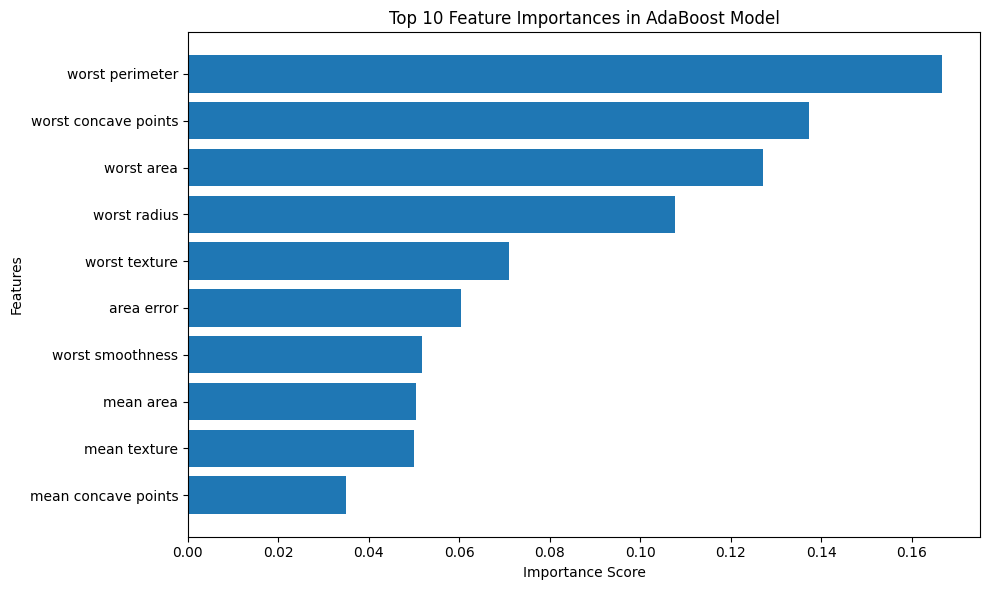

In [ ]:
feature_importance = best_model.feature_importances_
feature_names = data.feature_names

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\n" + "=" * 50)
print("TOP 10 MOST IMPORTANT FEATURES")
print("=" * 50)
print(importance_df.head(10).to_string(index=False))

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].head(10),  importance_df['Importance'].head(10))
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances in AdaBoost Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('adaboost_feature_importance.png', dpi=300, bbox_inches='tight')
print("\nFeature importance plot saved as 'adaboost_feature_importance.png'")

### 13. Saving the Best Model

In [ ]:
import joblib

model_filename = 'best_adaboost_model.pkl'
joblib.dump(best_model, model_filename)

scaler_filename = 'scaler.pkl'
joblib.dump(scaler, scaler_filename)

print(f"\nBest model saved as: {model_filename}")
print(f"Scaler saved as: {scaler_filename}")